In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots
from scipy.optimize import curve_fit
plt.style.use(['science','no-latex'])

df=pd.read_csv("/home/soumadip/Downloads/Expt 1 Data - Data.csv",delimiter=',')

In [4]:
df

,You are,Your height (in cm),Your blood group,Your Rh blood type,Height of your mother (in cm),Blood group of your mother,Rh blood type of your mother,Height of your father (in cm),Blood group of your father,Rh blood type of your father,...,Blood group of your sibling 2,Rh blood type of your sibling 2,Your sibling 3 is,Height of sibling 3 (in cm),Blood group of your sibling 3,Rh blood type of your sibling 3,Your sibling 4 is,Height of sibling 4 (in cm),Blood group of your sibling 4,Rh blood type of your sibling 4
0,Female,145.0,O,Rh positive,150.0,O,Rh positive,165,B,Rh positive,...,B,Rh positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,156.0,B,Rh negative,162.0,O,Rh positive,172,AB,Rh positive,...,O,Rh positive,Female,NaN,O,Rh positive,NaN,NaN,NaN,NaN
2,Female,160.0,O,Rh positive,157.0,O,Rh positive,172,A,Rh positive,...,A,Rh positive,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Female,168.0,B,Rh positive,154.0,B,Rh negative,163,B,Rh negative,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Female,163.0,A,Rh positive,158.0,B,Rh positive,162.5,B,Rh positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,Male,179.0,O,Rh positive,165.0,O,Rh positive,180,O,Rh positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,Male,180.0,O,Rh positive,167.0,B,Rh positive,175,B,Rh positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,Male,167.0,O,Rh positive,151.0,O,Rh positive,Deceased,O,Rh positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,Prefer not to say,173.0,O,Rh positive,160.0,AB,Rh positive,170,B,Rh positive,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
x=df["Your height (in cm)"]

In [6]:
x.size

97

In [7]:
x[14]

height=[]
for i in range(97):
    if i==14:
        continue
    else:
        height.append(x[i])

Text(0, 0.5, 'No. of Observations')

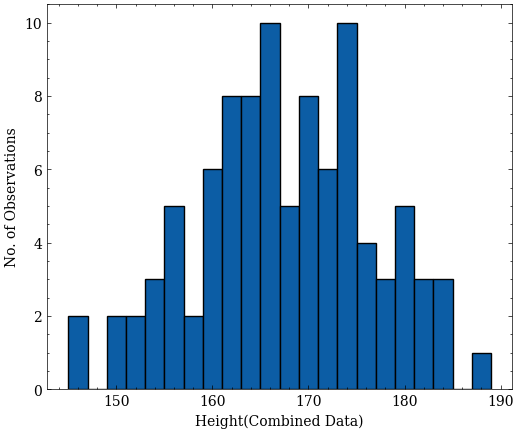

In [30]:
plt.figure(figsize=(6,5))
#plt.hist(height,bins=10)
plt.hist(height, bins=np.arange(min(height), max(height)+2, 2),edgecolor='black')
plt.xlabel('Height(Combined Data)')
plt.ylabel('No. of Observations')

In [37]:
np.mean(height)

167.05583333333334

In [38]:
np.std(height)**2

83.90647430555558

In [25]:
Blood=df['Your blood group']
Rh_fac=df['Your Rh blood type']

In [27]:
Rh_fac

0     Rh positive
1     Rh negative
2     Rh positive
3     Rh positive
4     Rh positive
         ...     
92    Rh positive
93    Rh positive
94    Rh positive
95    Rh positive
96    Rh positive
Name: Your Rh blood type, Length: 97, dtype: object

In [28]:
O_pos=0
O_neg=0
A_pos=0
A_neg=0
B_pos=0
B_neg=0
AB_pos=0
AB_neg=0
for i in range(Blood.size):
    if Blood[i]=='O':
        if Rh_fac[i]=='Rh positive':
            O_pos+=1
        else:
            O_neg+=1
    if Blood[i]=='A':
        if Rh_fac[i]=='Rh positive':
            A_pos+=1
        else:
            A_neg+=1
    if Blood[i]=='B':
        if Rh_fac[i]=='Rh positive':
            B_pos+=1
        else:
            B_neg+=1
    if Blood[i]=='AB':
        if Rh_fac[i]=='Rh positive':
            AB_pos+=1
        else:
            AB_neg+=1
        

Text(0, 0.5, 'No.of Observations')

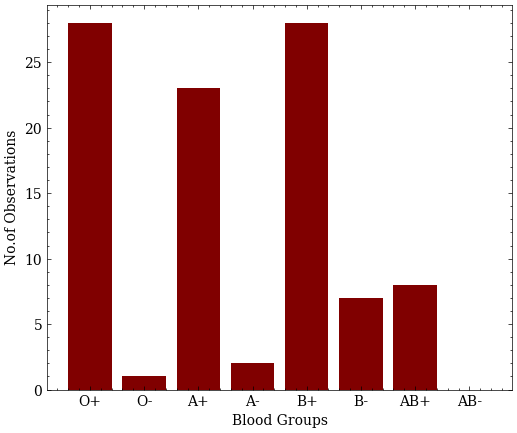

In [29]:
Blood_grps={'O+':O_pos,'O-':O_neg,'A+':A_pos,'A-':A_neg,'B+':B_pos,'B-':B_neg,'AB+':AB_pos,'AB-':AB_neg}
values=list(Blood_grps.values())
keyd=list(Blood_grps.keys())

plt.figure(figsize=(6,5))

plt.bar(keyd,values,color='maroon')
plt.xlabel('Blood Groups')
plt.ylabel('No.of Observations')

In [14]:
gender=df['You are']

In [15]:
male_height=[]
female_height=[]

for i in range(len(height)):
    if gender[i]=='Female':
        female_height.append(height[i])
    elif gender[i]=='Male':
        male_height.append(height[i])

In [16]:
np.mean(female_height)

160.03170731707314

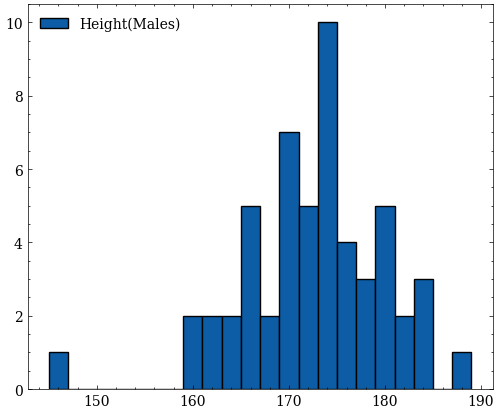

In [33]:

plt.figure(figsize=(6,5))
plt.hist(male_height,label='Height(Males)', bins=np.arange(min(male_height), max(male_height)+2, 2),edgecolor='black')
plt.legend()

In [39]:
np.mean(male_height)

172.11222222222221

In [40]:
np.std(male_height)**2

55.55902839506172

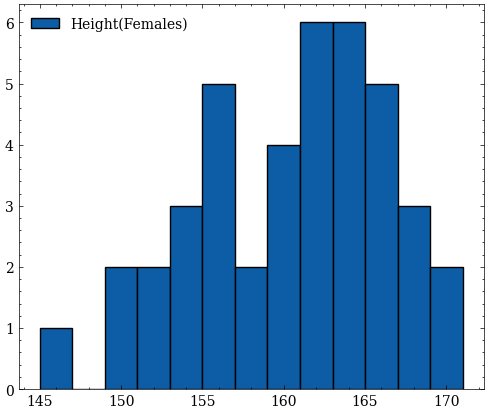

In [35]:
plt.figure(figsize=(6,5))

plt.hist(female_height,label='Height(Females)', bins=np.arange(min(female_height), max(female_height)+2, 2),edgecolor='black')
plt.legend()

In [42]:
np.mean(female_height)

160.03170731707314

In [43]:
np.std(female_height)**2

34.82956049970255

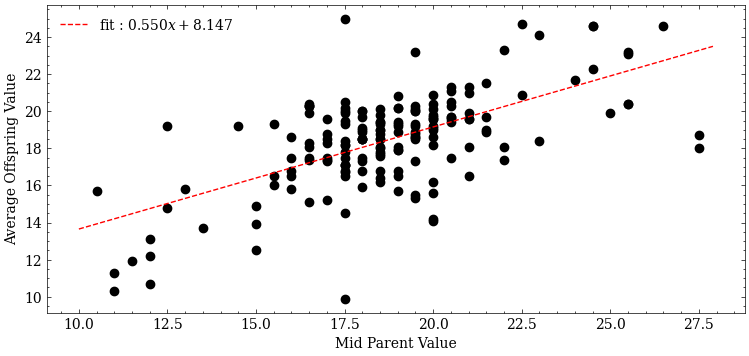

In [24]:
df=pd.read_csv('heredity.csv',delimiter=',')
x=df['Mid Parent Value']
y=df['\tAverage Offspring Value']
plt.figure(figsize=(9,4))
def f(x,a,b):
    return a*x+b

popt,pcov=curve_fit(f,x,y)
X=np.arange(10,28,0.1)
plt.plot(x,y,'ko')
plt.plot(X,f(X,*popt),'r--',label='fit : $0.550x+8.147$')

plt.xlabel('Mid Parent Value')
plt.ylabel('Average Offspring Value')
plt.legend()

In [17]:
popt

array([0.55037837, 8.14732287])

In [18]:
pcov

array([[ 0.0026954 , -0.05043929],
       [-0.05043929,  0.96754684]])